# Coding the Bollinger bands

Importing data for quandl

In [65]:
pip install quandl

Note: you may need to restart the kernel to use updated packages.


In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [89]:
import quandl

In [90]:
df = quandl.get("BSE/BOM500180", authtoken="Vmj51EQ9ZLGGpUYZAyse")

In [91]:
df.head(5)

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
Date,,,,,,,,,,,,
1995-05-26,42.00,45.00,38.50,40.00,0.000000,0.0,0.0,0.0,NaN,NaN,6.50,-2.00
1995-05-29,39.00,40.25,38.75,39.25,0.000000,0.0,0.0,0.0,NaN,NaN,1.50,0.25
1995-05-30,39.00,40.00,39.00,39.50,0.000000,0.0,0.0,0.0,NaN,NaN,1.00,0.50
1995-05-31,39.75,40.25,39.50,40.25,0.000000,0.0,0.0,0.0,NaN,NaN,0.75,0.50
1996-04-02,33.00,35.00,33.00,34.75,33.878745,70100.0,208.0,2374900.0,NaN,NaN,2.00,1.75


In [92]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [93]:
import plotly.graph_objects as go

In [94]:
from datetime import datetime

In [95]:
# Making candlestick pattern
fig = go.Figure(data=[go.Candlestick(x = df.index,
                                    open = df['Open'],
                                    high = df['High'],
                                    low = df['Low'],
                                    close = df['Close'])])
fig.show()

In [74]:
df['Moving average'] = df['Close'].rolling(20).mean()  # 20 day moving average
df['Upper'] = df['Moving average'] + 2*(df['Close'].rolling(20).std()) #upper band
df['Lower'] = df['Moving average'] - 2*(df['Close'].rolling(20).std()) #lower band

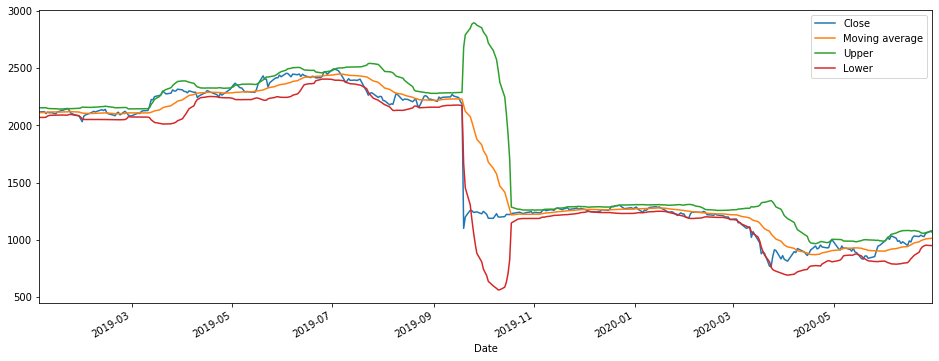

In [75]:
df[['Close','Moving average','Upper','Lower']].tail(365).plot(figsize=(16,6)) #Bollinger bands for one year time frame

Building a strategy 

In [76]:
df['position'] = None

In [77]:
df

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O,Moving average,Upper,Lower,position
Date,,,,,,,,,,,,,,,,
1995-05-26,42.00,45.00,38.50,40.00,0.000000,0.0,0.0,0.000000e+00,NaN,NaN,6.50,-2.00,NaN,NaN,NaN,None
1995-05-29,39.00,40.25,38.75,39.25,0.000000,0.0,0.0,0.000000e+00,NaN,NaN,1.50,0.25,NaN,NaN,NaN,None
1995-05-30,39.00,40.00,39.00,39.50,0.000000,0.0,0.0,0.000000e+00,NaN,NaN,1.00,0.50,NaN,NaN,NaN,None
1995-05-31,39.75,40.25,39.50,40.25,0.000000,0.0,0.0,0.000000e+00,NaN,NaN,0.75,0.50,NaN,NaN,NaN,None
1996-04-02,33.00,35.00,33.00,34.75,33.878745,70100.0,208.0,2.374900e+06,NaN,NaN,2.00,1.75,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-24,1045.85,1057.65,1029.70,1032.40,1044.900000,570032.0,20409.0,5.956278e+08,152791.0,26.80,27.95,-13.45,998.3625,1058.012619,938.712381,None
2020-06-25,1015.00,1049.00,1007.25,1028.95,1026.020000,807420.0,23987.0,8.284253e+08,198738.0,24.61,41.75,13.95,1002.5575,1058.079068,947.035932,None
2020-06-26,1040.00,1062.50,1027.65,1055.60,1043.140000,601584.0,25129.0,6.275339e+08,228826.0,38.04,34.85,15.60,1007.7750,1062.603273,952.946727,None


In [78]:
df.index

DatetimeIndex(['1995-05-26', '1995-05-29', '1995-05-30', '1995-05-31',
               '1996-04-02', '1996-04-03', '1996-04-04', '1996-04-05',
               '1996-04-08', '1996-04-09',
               ...
               '2020-06-17', '2020-06-18', '2020-06-19', '2020-06-22',
               '2020-06-23', '2020-06-24', '2020-06-25', '2020-06-26',
               '2020-06-29', '2020-06-30'],
              dtype='datetime64[ns]', name='Date', length=6017, freq=None)

In [79]:
mode = 'open'

In [80]:
mode = 'open'
for index in range(len(df)):
    if index == 0:
        continue

    row = df.iloc[index]
    prev_row = df.iloc[index - 1]

    # long?
    if mode == 'open' and row['Close'] < row['Lower'] and prev_row['Close'] > prev_row['Lower']:
        df.iloc[index, df.columns.get_loc('position')] = 1
        mode = 'close'

    # short?
    if mode == 'close' and row['Close'] > row['Upper'] and prev_row['Close'] < prev_row['Upper']:
        df.iloc[index, df.columns.get_loc('position')] = -1
        mode = 'open'


In [82]:
df.dropna(subset=['position'])

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O,Moving average,Upper,Lower,position
Date,,,,,,,,,,,,,,,,
1996-07-24,37.00,37.00,35.00,36.25,36.110417,120000.0,237.0,4333250.0,NaN,NaN,2.00,-0.75,38.1125,39.558684,36.666316,1
1996-10-23,38.00,39.25,38.00,39.00,38.729818,38400.0,154.0,1487225.0,NaN,NaN,1.25,1.00,35.6125,38.255639,32.969361,-1
1997-03-31,46.50,47.50,46.50,46.50,46.705538,64100.0,263.0,2993825.0,NaN,NaN,1.00,0.00,51.2750,55.281245,47.268755,1
1997-04-17,52.50,56.00,52.50,55.75,54.554822,103700.0,405.0,5657335.0,NaN,NaN,3.50,3.25,50.2750,54.362529,46.187471,-1
1997-05-28,55.75,55.75,54.50,55.00,55.137320,156401.0,246.0,8623532.0,NaN,NaN,1.25,-0.75,58.5000,61.960301,55.039699,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-14,1259.50,1277.40,1257.00,1273.70,1268.030000,139226.0,3870.0,176543263.0,63616.0,45.69,20.40,14.20,1243.0700,1272.332449,1213.807551,-1
2019-12-05,1254.10,1259.00,1240.10,1245.45,1250.400000,164968.0,6624.0,206276067.0,67435.0,40.88,18.90,-8.65,1266.5250,1286.404572,1246.645428,1
2019-12-18,1276.00,1298.80,1274.15,1292.35,1286.560000,282588.0,6472.0,363565562.0,139433.0,49.34,24.65,16.35,1263.3200,1290.564186,1236.075814,-1


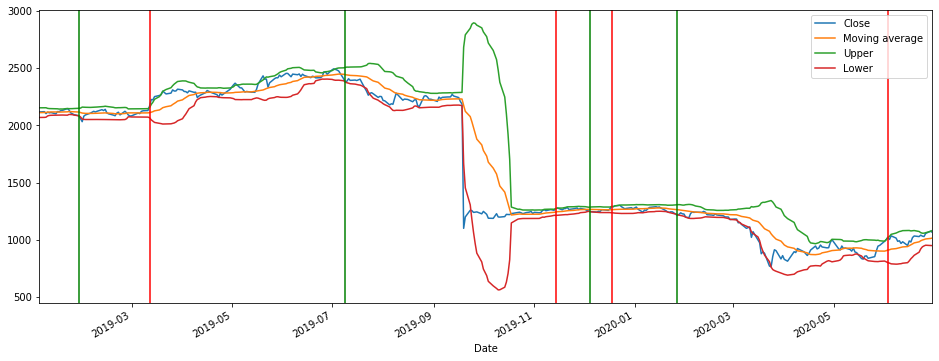

In [86]:
df[['Close', 'Moving average', 'Upper','Lower']].tail(365).plot(figsize=(16, 6))

for index, pos in df.dropna(subset=['position'])['position'].iteritems():
    plt.axvline(index, color='green' if pos == 1 else 'red')
